<h1><span style=color:#4e2488>By Aditi Vakeel<span></h1>

<h1> The Sparks Foundation<h1>

<h2>TASK:6: PREDICTION USING DECISION TREE<h2>

In [51]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
#importing the dataset
data=pd.read_csv(r"C:\DATA_SCI_FOR_GIT\Iris.csv",index_col='Id')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [54]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
data.dropna()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [56]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [57]:
data.shape

(150, 5)

<h2>Data Visualization :Pairwise plotting</h2>

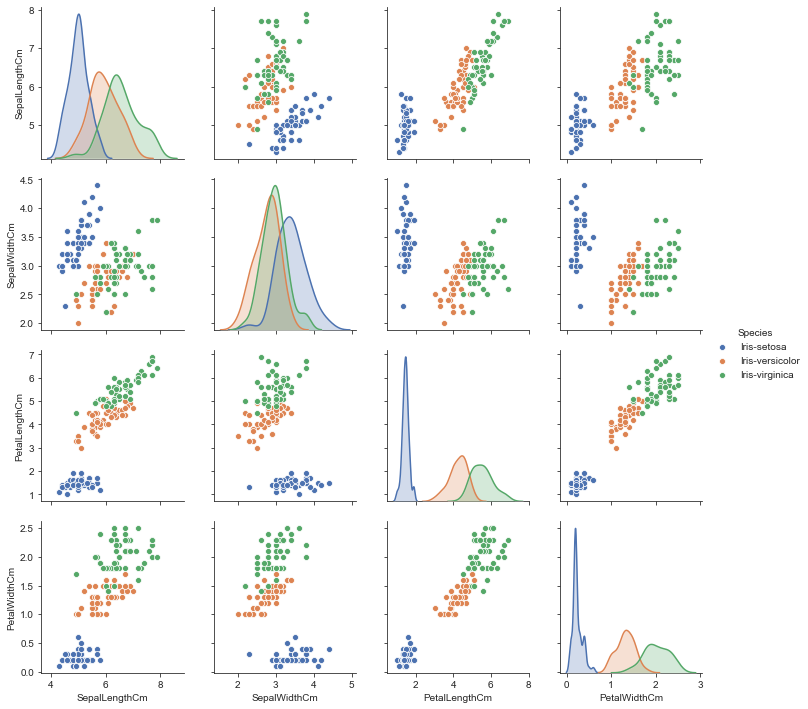

In [58]:
sns.set_style("ticks")
sns.pairplot(data,hue = 'Species',diag_kind = "kde",kind = "scatter",palette = "deep")
plt.show()

<h2>Train-test split</h2>

In [59]:
x=data.drop('Species',axis=1)
y=data['Species']

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [61]:
#feature scaling
from sklearn.preprocessing import StandardScaler  
s = StandardScaler()  
s.fit(x_train)
 
x_train = s.transform(x_train)  
x_test = s.transform(x_test)

<h2>Building the model</h2>

In [62]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [63]:
#Calculating the accuracy of the model
clf.score(x_train,y_train)

1.0

In [64]:
clf.score(x_test,y_test)

0.9777777777777777

In [65]:
y_pred=clf.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

<h2> Prediction using GINI index</h2>

In [66]:
clf_t= DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_t.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [67]:
clf_t.score(x_train,y_train)

0.9619047619047619

In [68]:
clf_t.score(x_test,y_test)


1.0

<h2> Let's predict :Predicting the species with SepalLengthCm-3.8,SepalWidthCm-2.0,PetalLengthCm-4.1,PetalWidthCm -2.3 </h2>

In [69]:
a=clf.predict([[3.8,2.0,4.1,2.3]])
print("The predicted class is {}".format(a[0]))

The predicted class is Iris-virginica


<h1>Visualizing the decision Tree</h1>

In [76]:
# Install required libraries
!pip install pydotplus


In [78]:
#importing all necessary libraries for visualization
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


C:\Users\pandu\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


[Text(418.5, 1223.1, 'PetalWidthCm <= -0.623\ngini = 0.666\nsamples = 105\nvalue = [33, 37, 35]\nclass = Iris-versicolor'),
 Text(354.11538461538464, 951.3, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = Iris-setosa'),
 Text(482.8846153846154, 951.3, 'PetalWidthCm <= 0.719\ngini = 0.5\nsamples = 72\nvalue = [0, 37, 35]\nclass = Iris-versicolor'),
 Text(257.53846153846155, 679.5, 'PetalLengthCm <= 0.687\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolor'),
 Text(128.76923076923077, 407.69999999999993, 'PetalWidthCm <= 0.585\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolor'),
 Text(64.38461538461539, 135.89999999999986, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(193.15384615384616, 135.89999999999986, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(386.3076923076923, 407.69999999999993, 'PetalWidthCm <= 0.451\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = Iris-vir

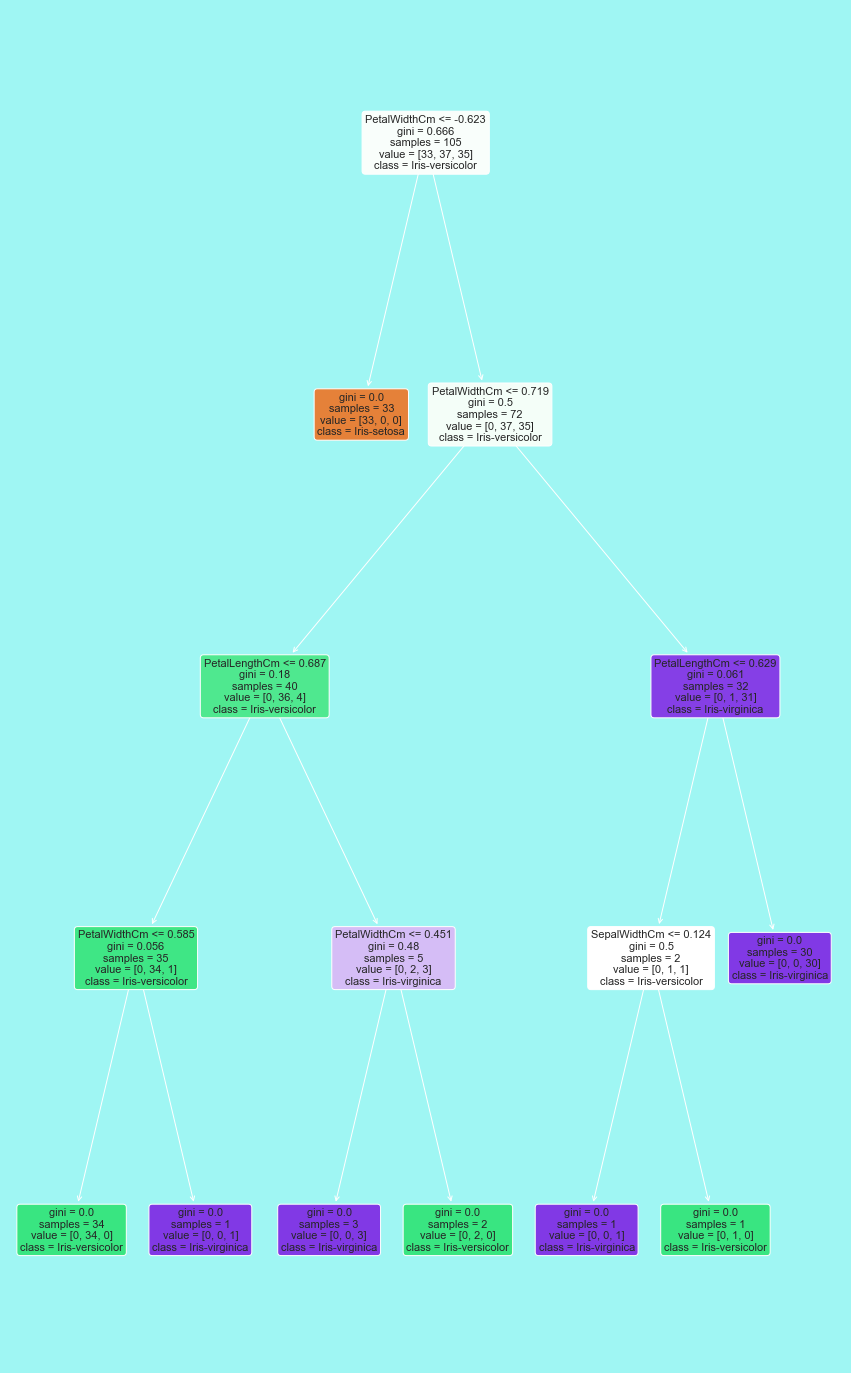

In [86]:
from sklearn import tree
from sklearn.tree import plot_tree
#f=data.drop(['Species'],axis=1).columns
#c=data['Species'].unique()
plt.figure(figsize=(15,25),frameon=True,facecolor='#9FF6F3',edgecolor='#212120')
tree.plot_tree(clf,feature_names=x.columns,class_names=y.unique(),rounded=True,filled=True)

## <span style=color:#EA2C19>Thank you!</span>